In [ ]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=84c2609ecc2866d5305227d2f890e1c3e06cbc7502a258241ea219dc4929b945
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandasql

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the CSV file

college_df = pd.read_csv(r'/content/drive/My Drive/DATA 606/Most-Recent-Field-Data-Elements.csv')

In [ ]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216638 entries, 0 to 216637
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UNITID           211020 non-null  float64
 1   OPEID6           216638 non-null  int64  
 2   INSTNM           216638 non-null  object 
 3   CONTROL          216638 non-null  object 
 4   MAIN             216638 non-null  int64  
 5   CIPCODE          216638 non-null  int64  
 6   CIPDESC          216638 non-null  object 
 7   CREDLEV          216638 non-null  int64  
 8   CREDDESC         216638 non-null  object 
 9   COUNT            216638 non-null  object 
 10  DEBTMEDIAN       216638 non-null  object 
 11  DEBTPAYMENT10YR  216638 non-null  object 
 12  DEBTMEAN         216638 non-null  object 
 13  TITLEIVCOUNT     216638 non-null  object 
 14  EARNINGSCOUNT    216638 non-null  object 
 15  MD_EARN_WNE      216638 non-null  object 
 16  IPEDSCOUNT1      183767 non-null  floa

In [ ]:
college_df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


In [ ]:
college_df.tail()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
216633,NaN,42817,Compton College,Public,1,5109,"Allied Health Diagnostic, Intervention, and Tr...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216634,NaN,42817,Compton College,Public,1,5111,Health/Medical Preparatory Programs.,2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216635,NaN,42817,Compton College,Public,1,5138,"Registered Nursing, Nursing Administration, Nu...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216636,NaN,42817,Compton College,Public,1,5202,"Business Administration, Management and Operat...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216637,NaN,42817,Compton College,Public,1,5203,Accounting and Related Services.,2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN


**We can see that there are a lot of 'Privacy Suppressed' values in the dataset. Numeric values are being treated as objects in presence of these suppressed values and will restrict my analysis. To move forward, the best option is to clean the dataset and remove all the suppressed values.**

In [ ]:
#Copying the original dataframe for future references

original_college_df=college_df.copy()

In [ ]:
indexNames = college_df[ college_df['COUNT'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['DEBTMEDIAN'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['CONTROL'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['EARNINGSCOUNT'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['TITLEIVCOUNT'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['MD_EARN_WNE'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

indexNames = college_df[ college_df['DEBTPAYMENT10YR'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)
         
indexNames = college_df[ college_df['DEBTMEAN'] == 'PrivacySuppressed' ].index 
college_df.drop(indexNames , inplace=True)

In [ ]:
college_df.to_csv(r'/content/drive/My Drive/DATA 606/Most-Recent-Field-Data-Elements_cleaned.csv')

In [ ]:
college_df = pd.read_csv(r'/content/drive/My Drive/DATA 606/Most-Recent-Field-Data-Elements_cleaned.csv')

In [ ]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       36720 non-null  int64  
 1   UNITID           36720 non-null  float64
 2   OPEID6           36720 non-null  int64  
 3   INSTNM           36720 non-null  object 
 4   CONTROL          36720 non-null  object 
 5   MAIN             36720 non-null  int64  
 6   CIPCODE          36720 non-null  int64  
 7   CIPDESC          36720 non-null  object 
 8   CREDLEV          36720 non-null  int64  
 9   CREDDESC         36720 non-null  object 
 10  COUNT            36720 non-null  int64  
 11  DEBTMEDIAN       36720 non-null  int64  
 12  DEBTPAYMENT10YR  36720 non-null  int64  
 13  DEBTMEAN         36720 non-null  int64  
 14  TITLEIVCOUNT     36720 non-null  int64  
 15  EARNINGSCOUNT    36720 non-null  int64  
 16  MD_EARN_WNE      36720 non-null  int64  
 17  IPEDSCOUNT1 

We can see that the number of instances have decreased from 216638 to 36720 and now the datatypes are not objects anymore.

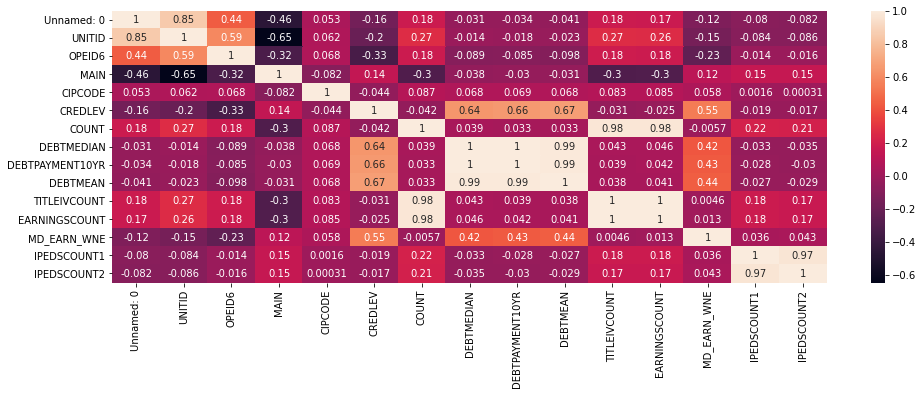

In [ ]:
corrMatrix = college_df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Adding the location of universities.**

In [ ]:
all_scorecard_data = pd.read_csv(r'/content/drive/My Drive/DATA 606/Most-Recent-Cohorts-All-Data-Elements.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,1547,1589,1595,1596,1597,1598,1601,1602,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1653,1657,1664,1665,1666,1669,1670,1674,1679,1683,1688,1689,1690,1691,1692,1697,1700,1702,1703,1704,1705,1706,1707,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1846,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
all_scorecard_data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,BBRR2_PP_UGNOCOMP_DFR,BBRR2_PP_UGNOCOMP_NOPROG,BBRR2_PP_UGNOCOMP_MAKEPROG,BBRR2_PP_UGNOCOMP_PAIDINFULL,BBRR2_PP_UGNOCOMP_DISCHARGE,BBRR2_PP_UGUNK_N,BBRR2_PP_UGUNK_DFLT,BBRR2_PP_UGUNK_DLNQ,BBRR2_PP_UGUNK_FBR,BBRR2_PP_UGUNK_DFR,BBRR2_PP_UGUNK_NOPROG,BBRR2_PP_UGUNK_MAKEPROG,BBRR2_PP_UGUNK_PAIDINFULL,BBRR2_PP_UGUNK_DISCHARGE,BBRR2_FED_UG_N_SUPP,BBRR2_FED_UG_DFLT_SUPP,BBRR2_FED_UG_DLNQ_SUPP,BBRR2_FED_UG_FBR_SUPP,BBRR2_FED_UG_DFR_SUPP,BBRR2_FED_UG_NOPROG_SUPP,BBRR2_FED_UG_MAKEPROG_SUPP,BBRR2_FED_UG_PAIDINFULL_SUPP,BBRR2_FED_UG_DISCHARGE_SUPP,BBRR2_FED_UGCOMP_N_SUPP,BBRR2_FED_UGCOMP_DFLT_SUPP,BBRR2_FED_UGCOMP_DLNQ_SUPP,BBRR2_FED_UGCOMP_FBR_SUPP,BBRR2_FED_UGCOMP_DFR_SUPP,BBRR2_FED_UGCOMP_NOPROG_SUPP,BBRR2_FED_UGCOMP_MAKEPROG_SUPP,BBRR2_FED_UGCOMP_PAIDINFULL_SUPP,BBRR2_FED_UGCOMP_DISCHARGE_SUPP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,LPGPLUS_CNT,LPGPLUS_AMT,FEDSCHCD,SEARCH_STRING
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,...,0.21225382932166,0.12472647702407,PrivacySuppressed,PrivacySuppressed,0.03501094091903,81,0.17283950617283,PrivacySuppressed,0.30864197530864,0.18518518518518,0.1358024691358,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,2902,0.17263955892487,0.07477601654031,0.28049620951068,0.17849758787043,0.23880082701585,0.03893866299104,0.00792556857339,0.00792556857339,777,0.04375804375804,0.03474903474903,0.26640926640926,0.18532818532818,0.38352638352638,0.06435006435006,PrivacySuppressed,PrivacySuppressed,31374,922456254,5201,113949554,1004,15578483,001002,Alabama A & M University AAMU
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,3.0,0,1,1,3,4,1,1,5,12.0,NaN,33.505697,-86.799345,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.9211,0.9211,490.0,620.0,...,PrivacySuppressed,0.21875,PrivacySuppressed,0.06770833333333,0.07291666666666,57,PrivacySuppressed,PrivacySuppressed,0.29824561403508,PrivacySuppressed,0.17543859649122,PrivacySuppressed,0.21052631578947,PrivacySuppressed,5597,0.06038949437198,0.03448275862068,0.18224048597462,0.19063784170091,0.27818474182597,0.18813650169733,0.05967482579953,0.00625335000893,2671,0.02134032197678,PrivacySuppressed,0.15612130288281,0.1681018345189,0.31074503931111,0.24560089853987,0.06289779108947,PrivacySuppressed,56997,1720042015,3727,87421879,3461,134126588,001052,University of Alabama at Birmingham
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,3.0,0,1,1,3,4,2,1,5,12.0,NaN,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,299,0.1571906354515,0.05016722408026,0.31103678929765,0.13377926421404,0.2943143812709,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,41,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4463,174222020,16,309618,298,16290781,016885,Amridge University Southern Christian Universi...
3,100706,105500,1055,Univ

In [ ]:
loc_df=all_scorecard_data[['INSTNM','CITY','STABBR','ZIP','TUITFTE','INEXPFTE','ACCREDAGENCY','FTFTPCTPELL']]

In [ ]:
college_df = pd.merge(college_df,loc_df,on='INSTNM',how='inner')

In [ ]:
college_df.head()

,Unnamed: 0,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STABBR,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL
0,15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057
1,24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057
2,27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057
3,37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057
4,38,100654.0,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelors Degree,59,34000,353,32783,31,30,23800,30.0,43.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057


In [ ]:
college_df = college_df.rename(columns={'STABBR': 'STATE'})

Editing the columns:

In [ ]:
#Removing the '.' at the end of every entry

college_df['CIPDESC']=college_df['CIPDESC'].str[:-1]

In [ ]:
college_df['CIPDESC'].head(10)

0           Computer and Information Sciences, General
1    Teacher Education and Professional Development...
2    Electrical, Electronics and Communications Eng...
3    Liberal Arts and Sciences, General Studies and...
4                                     Biology, General
5                                     Biology, General
6          Clinical, Counseling and Applied Psychology
7                                          Social Work
8        Communication Disorders Sciences and Services
9    Business Administration, Management and Operat...
Name: CIPDESC, dtype: object

In [ ]:
#Removing the symbol in Bachelor's degree 

college_df=college_df.replace({'CREDDESC':'Bachelor\x92s Degree'},{'CREDDESC':"Bachelor's Degree"})

In [ ]:
college_df['CREDDESC'].unique()

array(["Bachelor's Degree", "Master's Degree",
       'Graduate/Professional Certificate', 'First Professional Degree',
       'Doctoral Degree', "Associate's Degree",
       'Undergraduate Certificate or Diploma'], dtype=object)

**Appending the cost of living index by state**

In [ ]:
df_col = pd.read_csv(r'/content/drive/My Drive/DATA 606/relative_dollar_by_state.csv')

In [ ]:
df_col.head()

,State_Long,STATE,cost_living_index_2020,relative_value_dollar_2017
0,Mississippi,MS,84.8,116.69
1,Oklahoma,OK,86.8,112.36
2,Arkansas,AR,87.8,115.61
3,Kansas,KS,87.9,111.11
4,Missouri,MO,88.9,111.73


In [ ]:
college_df = pd.merge(college_df,df_col,on='STATE',how='inner')

In [ ]:
college_df.head()

,Unnamed: 0,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,State_Long,cost_living_index_2020,relative_value_dollar_2017
0,15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General",3,Bachelor's Degree,25,36250,376,37194,33,33,54300,17.0,16.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,Alabama,89.4,115.34
1,24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelor's Degree,46,31505,327,33085,32,31,25400,24.0,33.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,Alabama,89.4,115.34
2,27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor's Degree,22,34809,361,36482,33,31,54500,19.0,11.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,Alabama,89.4,115.34
3,37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,39,29956,311,30970,30,30,24000,28.0,28.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,Alabama,89.4,115.34
4,38,100654.0,1002,Alabama A & M University,Public,1,2601,"Biology, General",3,Bachelor's Degree,59,34000,353,32783,31,30,23800,30.0,43.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,Alabama,89.4,115.34


In [ ]:
del college_df['State_Long']

In [ ]:
college_df.isna().sum()

Unnamed: 0                       0
UNITID                           0
OPEID6                           0
INSTNM                           0
CONTROL                          0
MAIN                             0
CIPCODE                          0
CIPDESC                          0
CREDLEV                          0
CREDDESC                         0
COUNT                            0
DEBTMEDIAN                       0
DEBTPAYMENT10YR                  0
DEBTMEAN                         0
TITLEIVCOUNT                     0
EARNINGSCOUNT                    0
MD_EARN_WNE                      0
IPEDSCOUNT1                    622
IPEDSCOUNT2                    519
CITY                             0
STATE                            0
ZIP                              0
TUITFTE                         96
INEXPFTE                        96
ACCREDAGENCY                  1273
FTFTPCTPELL                   1494
cost_living_index_2020           0
relative_value_dollar_2017       0
dtype: int64

Importing the university ranking dataset from Kaggle. The original source is Center for World University Rankings (CWUR). [link to the website: https://cwur.org/about.php ]

In [ ]:
ranking_df = pd.read_csv(r'/content/drive/My Drive/DATA 606/cwurData.csv')

In [ ]:
ranking_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
ranking_df['institution'].nunique()

1024

In [ ]:
ranking_df[ranking_df['institution']=="California Institute of Technology"]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
110,11,California Institute of Technology,USA,9,5,101,7,38,24,25,NaN,17,77.59,2013
211,12,California Institute of Technology,USA,10,6,303,7,48,6,16,24.0,9,85.50,2014
1211,12,California Institute of Technology,USA,10,6,328,7,53,9,19,25.0,13,84.40,2015


We have multiple rankings for a single university here but there are no details about its uniqueness. I will be taking the average of these ranking as the ranking do not have a huge difference.<br>
For example, California Institute of Technology	has rankings 4,9,10 and 10.

In [ ]:
university_ranking_df=ranking_df.groupby("institution",as_index=False)['national_rank'].mean().round()

In [ ]:
university_ranking_df=university_ranking_df.rename(columns={"institution": "INSTNM"})

In [ ]:
university_ranking_df.head()

,INSTNM,national_rank
0,AGH University of Science and Technology,4.0
1,Aalborg University,5.0
2,Aalto University,4.0
3,Aarhus University,2.0
4,Aberystwyth University,59.0


In [ ]:
final_college_df = pd.merge(college_df,university_ranking_df,on='INSTNM',how='inner')

In [ ]:
final_college_df.head()

,Unnamed: 0,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017,national_rank
0,62,100663.0,1052,University of Alabama at Birmingham,Public,1,901,Communication and Media Studies,3,Bachelor's Degree,86,21474,223,21667,92,84,26300,80.0,85.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
1,64,100663.0,1052,University of Alabama at Birmingham,Public,1,1101,"Computer and Information Sciences, General",3,Bachelor's Degree,36,27750,288,25889,34,34,56900,30.0,35.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
2,69,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,5,Master's Degree,41,22601,263,25440,48,48,50500,58.0,11.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
3,72,100663.0,1052,University of Alabama at Birmingham,Public,1,1304,Educational Administration and Supervision,8,Graduate/Professional Certificate,22,57346,668,56814,22,22,57200,28.0,7.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0
4,73,100663.0,1052,University of Alabama at Birmingham,Public,1,1310,Special Education and Teaching,5,Master's Degree,36,28218,329,28717,27,27,43700,29.0,28.0,Birmingham,AL,35294-0110,13177.0,16454.0,Southern Association of Colleges and Schools C...,0.3788,89.4,115.34,71.0


In [ ]:
final_college_df['national_rank'].isnull().sum()

0

In [ ]:
#final_college_df.to_csv(r'/content/drive/My Drive/DATA 606/Final.csv')S

In [ ]:
#Saving the dataframe for future use

final_college_df.to_csv('Final.csv')